# Chapter 13 - The kNN Model

## Listing 13-1. Import the traffic data

https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume

In [13]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [14]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
metro_interstate_traffic_volume = fetch_ucirepo(id=492) 
  
# data (as pandas dataframes) 
X = metro_interstate_traffic_volume.data.features 
y = metro_interstate_traffic_volume.data.targets 
  
# metadata 
print(metro_interstate_traffic_volume.metadata) 
  
# variable information 
print(metro_interstate_traffic_volume.variables) 

# Merge the features and target into a single DataFrame
data = pd.concat([X, y], axis=1)

data.head()

{'uci_id': 492, 'name': 'Metro Interstate Traffic Volume', 'repository_url': 'https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume', 'data_url': 'https://archive.ics.uci.edu/static/public/492/data.csv', 'abstract': 'Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 48204, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['traffic_volume'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5X60B', 'creators': ['John Hogue'], 'intro_paper': None, 'additional_info': {'summary': 'Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weath

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Listing 13-2. Feature engineering to create the additional explanaotry variables

In [15]:
data['year'] = data['date_time'].apply(lambda x: x[:4])
data['month'] = data['date_time'].apply(lambda x: x[5:7])
data['weekday'] = pd.to_datetime(data['date_time']).apply(lambda x: x.weekday())
data['hour'] = pd.to_datetime(data['date_time']).apply(lambda x: x.hour)
data['isholiday'] = (data['holiday'] == 'None').apply(float)

In [16]:
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,weekday,hour,isholiday
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10,1,9,0.0
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10,1,10,0.0
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10,1,11,0.0
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10,1,12,0.0
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10,1,13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,2018,09,6,19,0.0
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,2018,09,6,20,0.0
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,2018,09,6,21,0.0
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,2018,09,6,22,0.0


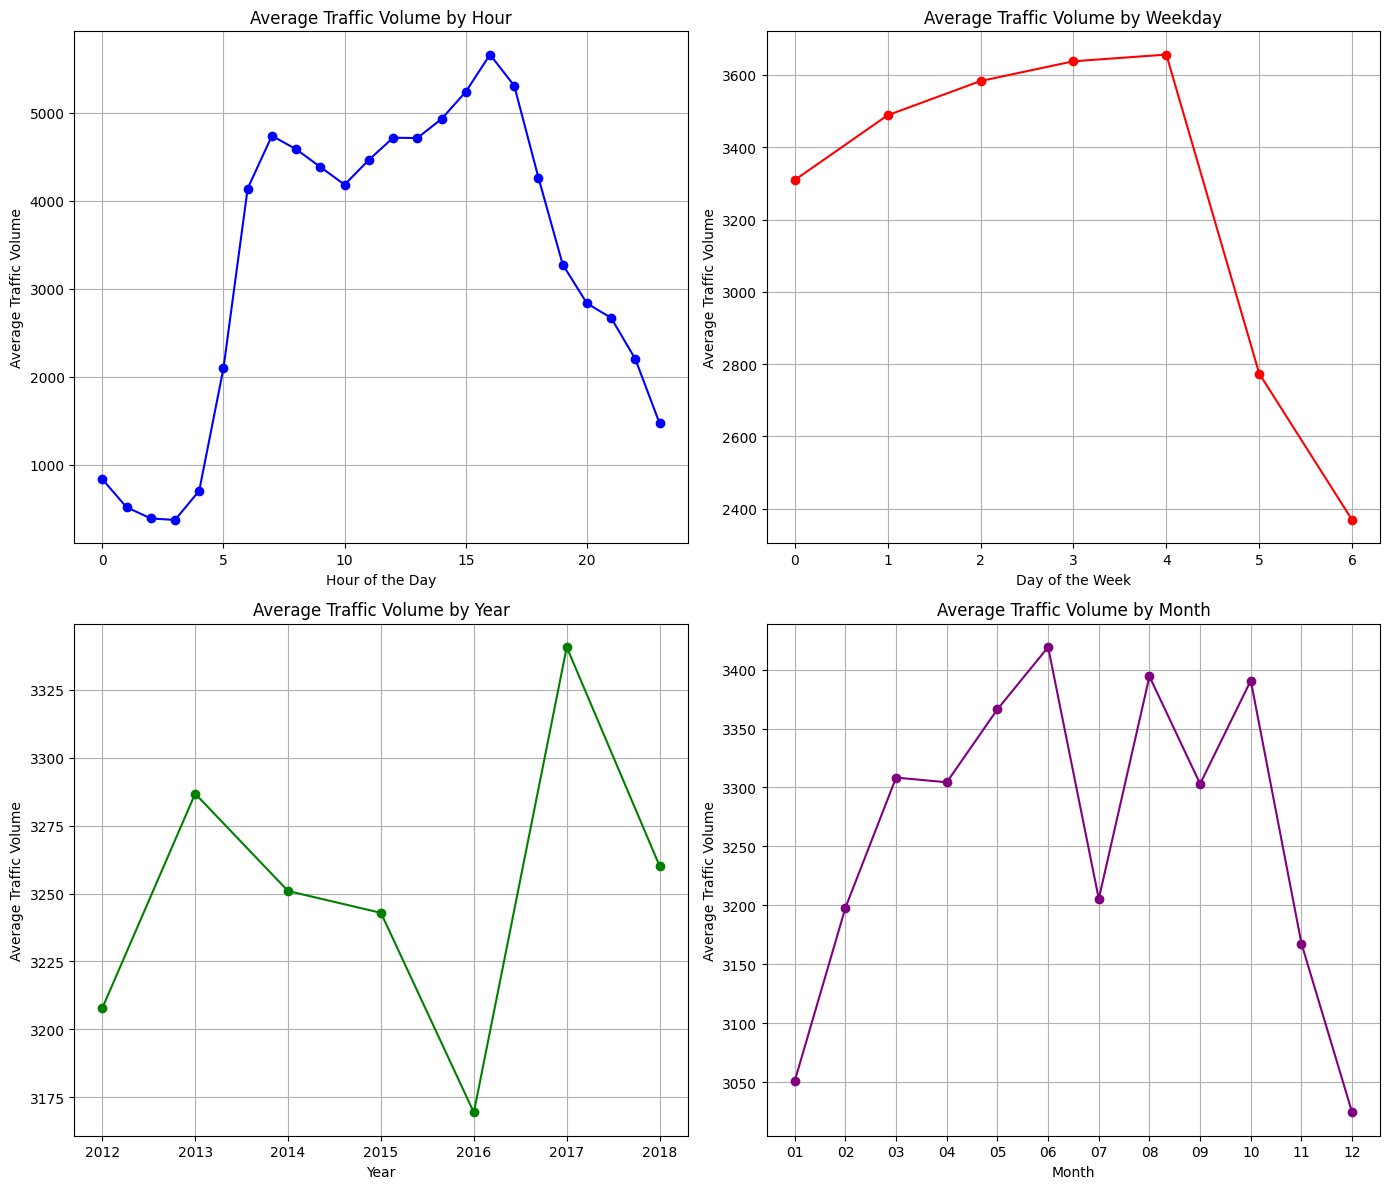

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Creating a figure with a grid of 2x2 subplots
plt.figure(figsize=(14, 12))

# Plotting 'traffic_volume' against 'hour'
plt.subplot(2, 2, 1)  # Top-left subplot
plt.plot(data.groupby('hour')['traffic_volume'].mean(), marker='o', linestyle='-', color='b')
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Plotting 'traffic_volume' against 'weekday'
plt.subplot(2, 2, 2)  # Top-right subplot
plt.plot(data.groupby('weekday')['traffic_volume'].mean(), marker='o', linestyle='-', color='r')
plt.title('Average Traffic Volume by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Plotting 'traffic_volume' against 'year'
plt.subplot(2, 2, 3)  # Bottom-left subplot
plt.plot(data.groupby('year')['traffic_volume'].mean(), marker='o', linestyle='-', color='g')
plt.title('Average Traffic Volume by Year')
plt.xlabel('Year')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Plotting 'traffic_volume' against 'month'
plt.subplot(2, 2, 4)  # Bottom-right subplot
plt.plot(data.groupby('month')['traffic_volume'].mean(), marker='o', linestyle='-', color='purple')
plt.title('Average Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()





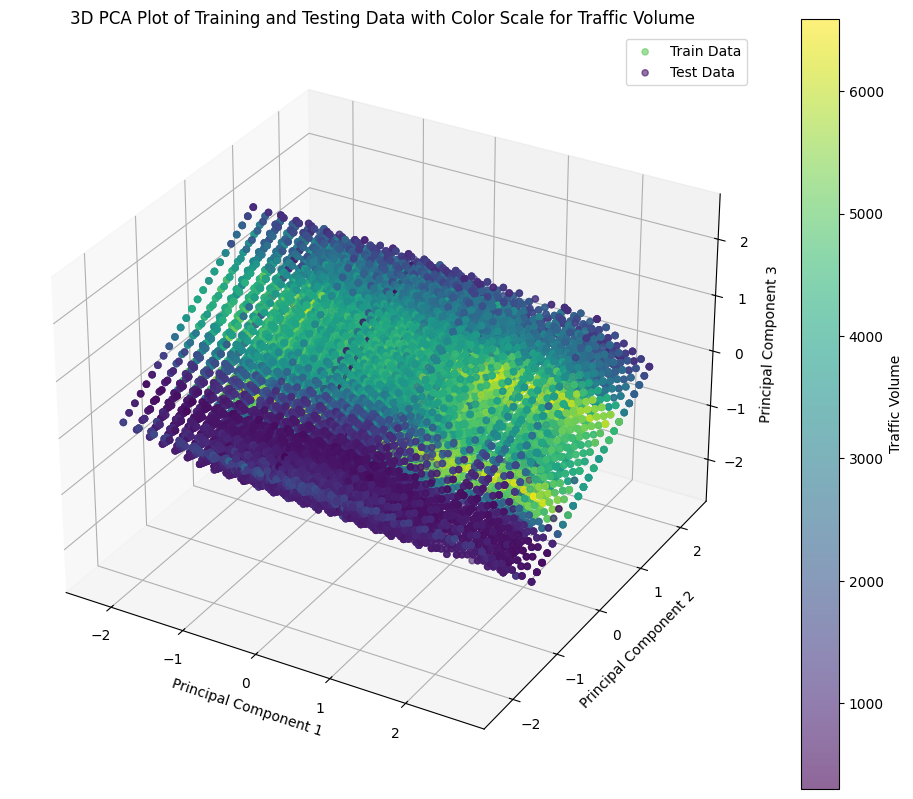

In [23]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your data
# data = pd.read_csv('path_to_your_data.csv')
# Example structure of data assumed as mentioned earlier
# X = data[['year', 'month', 'weekday', 'hour', 'isholiday']]
# y = data['traffic_volume']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=12345, shuffle=False)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA to reduce dimensions to 3
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plotting the results in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a color map
cm = plt.get_cmap('viridis')

# Scale the target variable between 0 and 1 for the colormap
sc = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap=cm, label='Train Data', alpha=0.6)
sc = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c=y_test, cmap=cm, label='Test Data', alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc, ax=ax, label='Traffic Volume')

ax.legend()

plt.title('3D PCA Plot of Training and Testing Data with Color Scale for Traffic Volume')
plt.show()

## Listing 13-3. Creating the train test split and computing the R2 of the default model

In [17]:
# Create objects X and y
X = data[['year', 'month', 'weekday', 'hour', 'isholiday']]
y = data['traffic_volume']

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=12345, shuffle=False)

from sklearn.neighbors import KNeighborsRegressor
my_dt = KNeighborsRegressor()
my_dt.fit(X_train, y_train)

fcst = my_dt.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(list(y_test), list(fcst)))


0.9725269542830707


## Listing 13-4. Creating a plot on the data of the test set

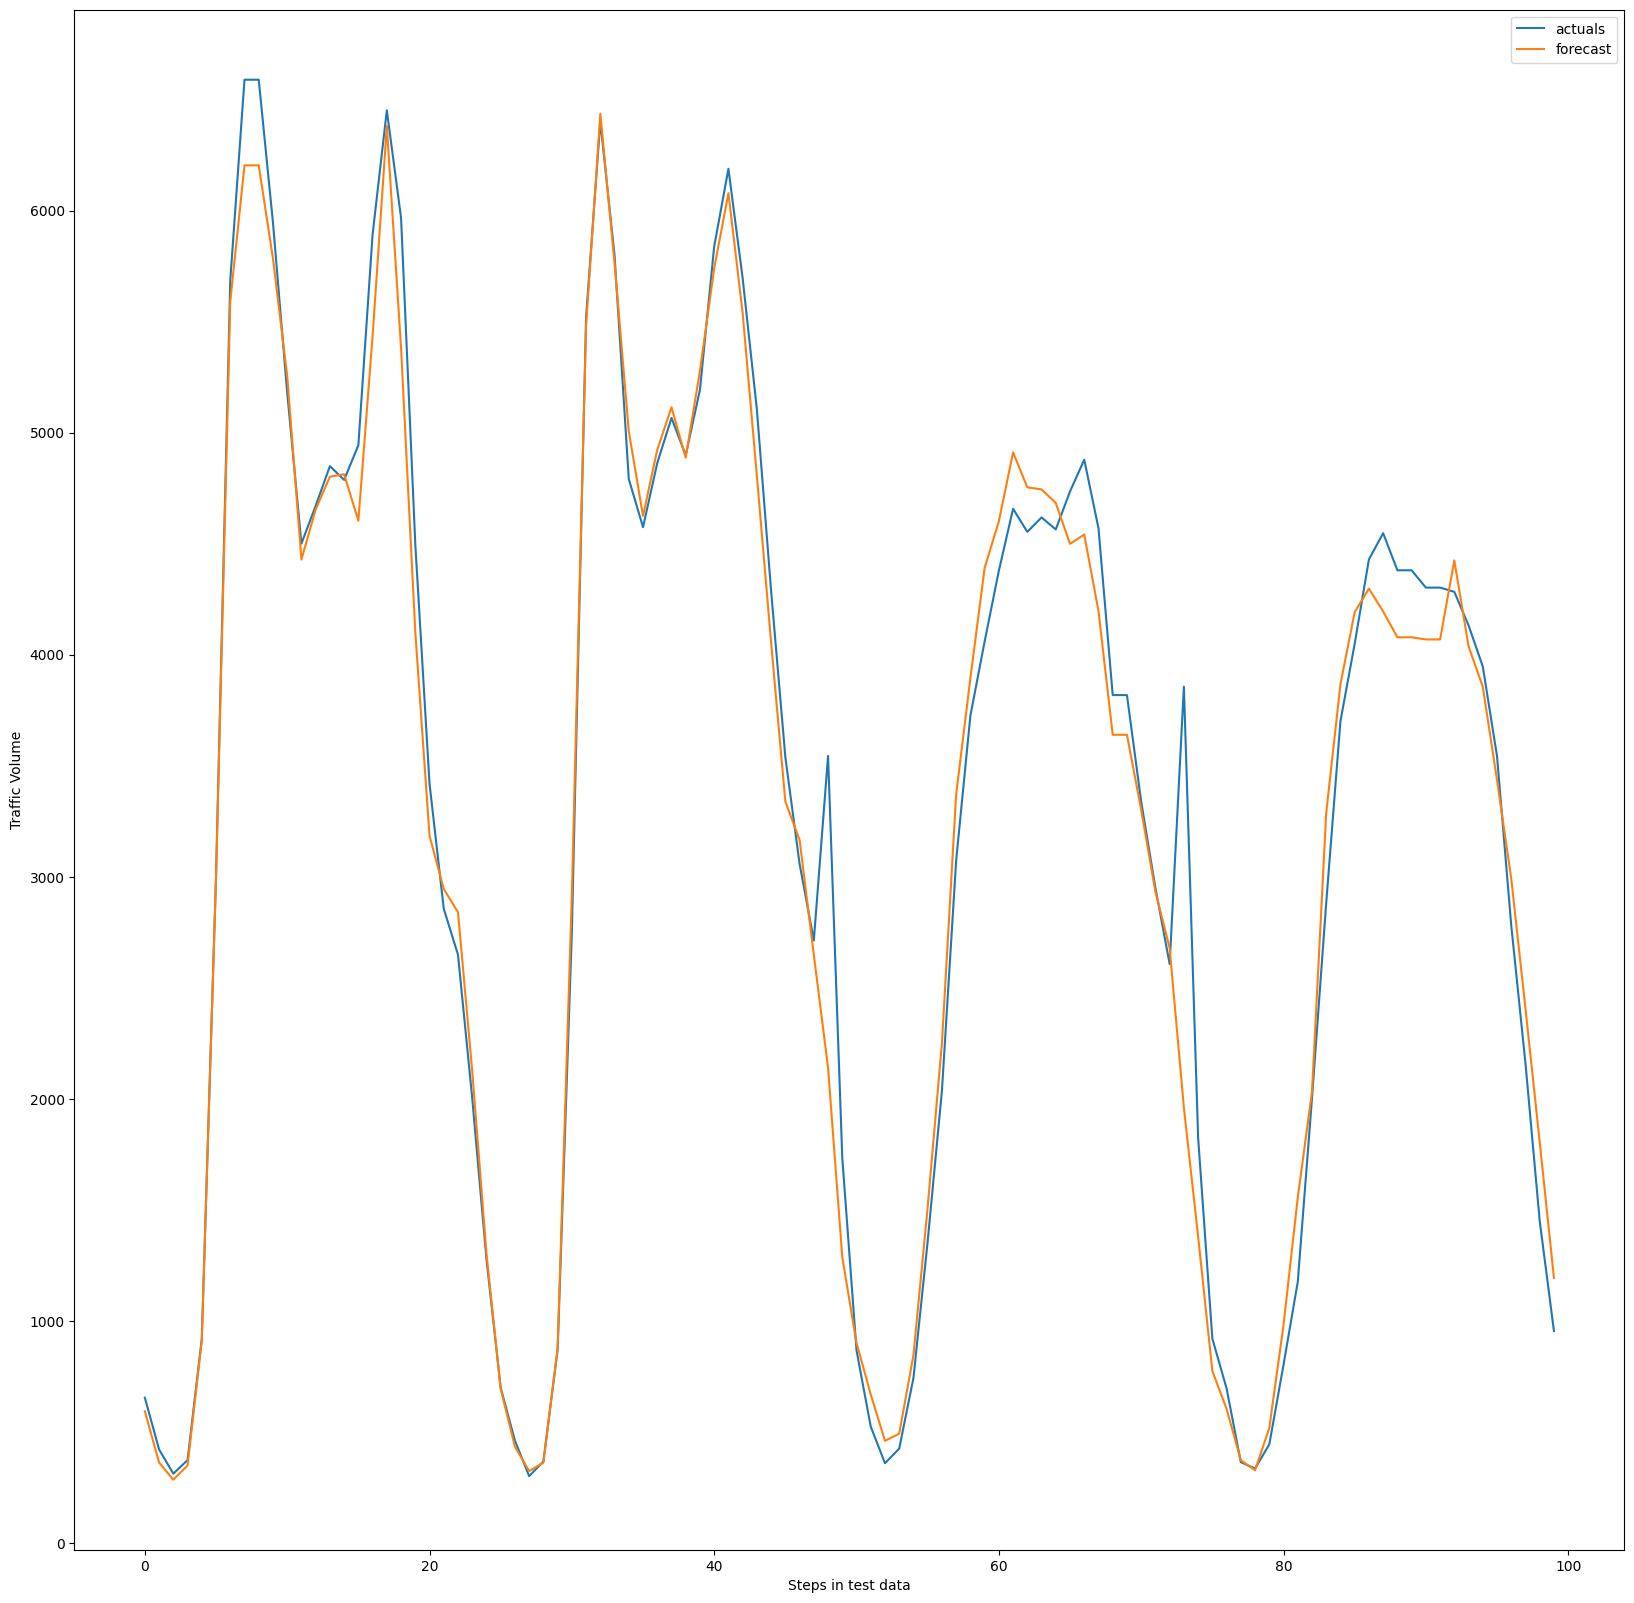

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot(list(y_test))
plt.plot(list(fcst))
plt.legend(['actuals', 'forecast'])
plt.ylabel('Traffic Volume')
plt.xlabel('Steps in test data')
plt.show()


## Listing 13-5. Adding a grid search cross-validation to the knn model

In [19]:
from sklearn.model_selection import GridSearchCV

my_knn = GridSearchCV(KNeighborsRegressor(), 
                 {'n_neighbors':[2, 4, 6, 8, 10, 12]},
                scoring = 'r2', n_jobs = -1)

my_knn.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_knn.predict(X_test))))
print(my_knn.best_estimator_)


0.9725407597388049
KNeighborsRegressor(n_neighbors=10)


## Listing 13-6. Adding a random search cross-validation to the knn model

In [20]:
from sklearn.model_selection import RandomizedSearchCV

my_knn = RandomizedSearchCV(KNeighborsRegressor(), 
                 {'n_neighbors':list(range(1, 20))},
                scoring = 'r2', n_iter=10, n_jobs = -1)

my_knn.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_knn.predict(X_test))))
print(my_knn.best_estimator_)


0.9725407597388049
KNeighborsRegressor(n_neighbors=10)
